# Boosting
---

**Бустинг** - это не алгоритм машинного обучения, а методология для применения к существующим алгоритмам машинного обучения. Наиболее часто бустинг применяют к деревьям решений, потому что именно для них получаются наилучшие результаты.

Иногда бустинг называют алгоритмом мета-обучения, потому что это процесс, в который можно встроить любой алгоритм машинного обучения.

Основная формула для бустинга: $$F_T(x) = \sum_{t=1}^{T}f_t(x)$$
Общий результат модели бустинга, равен сумме T результатов отдельных моделей. Когда мы говорим о бустинге, мы берём набор отдельных моделей, которые называются "слабыми моделями", и собираем эти модели в общий ансамбль моделей, который уже получается сильным. То есть $f_t$ - это некоторый коэффициент $\alpha_t$ умноженный на модель машинного обучения(может быть любой) $h(x)$: $$f_t(x)=\alpha_th(x)$$
Здесь буква $h$ - это сокращение от слова *hypothesis*, т.е. отдельные модели предлагают некоторые гипотезы о том, как может выглядеть результат модели как для задач регрессии, так и для задач классификации.

В итоге мы предполагаем, что комбинация отдельных моделей, с некоторыми коэффициентами, может в итоге создать хорошую модель-ансамбль.

Мы стараемся ответить на вопрос - **может ли ансамбль из слабых(простых) моделей стать сильной моделью?**

Для деревьев решений в качестве $h(x)$ можно взять отдельные деревья и объединить их с некоторыми коэффициентами в единую модель.

Ошибки, на каждом шаге процесса, вычисляются по формуле: $$E_t = \sum_i[F_{t-1}(x_i)+\alpha_th(x_i)]$$
Это сумма по всем точкам $x_i$ и в каждом случае берётся ошибка для предыдущего шага $f_{t-1}$ и добавляется очередная модель $\alpha_th(x_i)$. Здесь общая задача состоит в том, чтобы подобрать такие коэффициенты $\alpha_t$, чтобы минимизировать эту ошибку.

---
---
# Адаптивный бустинг - AdaBoost

Адаптивный бустинг использует ансамбли слабых моделей и затем объединяет их в единую модель с помощью взвешенной суммы. Адаптация состоит в том, что ранее созданные слабые модели используются при построении следующих слабых моделей, уточняя их поведение для неправильно классифицированных точек. 

Здесь, вместо создания целого набора деревьев решений параллельно между собой, как это делается в случайных лесах, эти деревья создаются последовательно. Создаётся первое дерево, далее используются результаты работы этого дерева для создания второго дерева и т.д. В итоге модель постепенно *адаптируется* к ранее полученным результатам и на каждом шаге старается их улучшить.

## Что такое слабая модель(weak learner)?

Слабая модель - это слишком простая модель, которая сама по себе не даёт достаточно хороших результатов. Например, для деревьев решений простейшей моделью будет модель, которая содержит один корневой узел и два листовых узла:

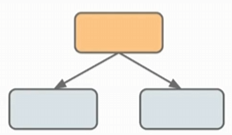

Далее на основе таких простых деревьев, с помощью адаптивного бустинга, мы построим хорошо работающую модель.

В отличие от **одного дерева решений**, которое **обучается сразу на всех данных**, **AdaBoost** агрегирует несколько слабых моделей, позволяя обучать результирующую ансамблевую модель **постепенно**.

## Рассмотрим на примере

Представим задачу классификации, в которой есть два признака - X1, X2 и два класса - синие и красные точки:

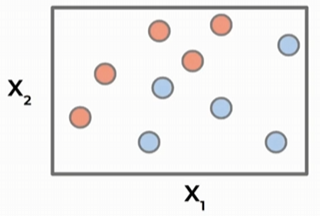

Как для этих данных может выглядеть простейшее дерево решений? Такое дерево может содержать только один признак - либо X1, либо X2. Допустим мы берём признак X1, с помощью которого разбиваем данные на два класса - красные и синие точки:

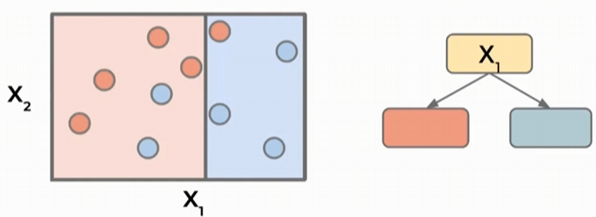

Здесь некоторые точки были классифицированы неправильно.

Если взять признак X2, опять получатся некоторые точки, которые будут классифицированы неправильно:

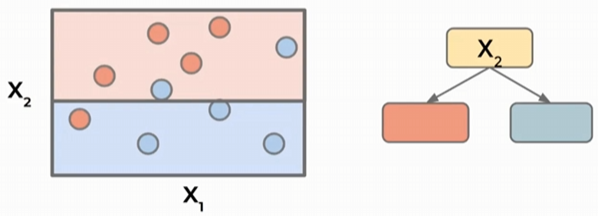

**Можно сделать следующее** - построить несколько таких простейших деревьев и затем дать им некоторые веса, чтобы объединить их в единую модель.

Как можно объединять между собой простейшие деревья и как это улучшит модель в целом?

## Процесс AdaBoost: Шаги алгоритма

**Терминология для алгоритма:**

Кроме коэффициентов $\alpha_t$, также существуют коэффициенты $w_{i,t}$, которые будут применяться к отдельным точкам в наборе данных. Индекс *i* - отвечает за точки в наборе данных, а индекс *t* - отвечает за номер дерева в наборе из T деревьев. Таким образом, для каждой точки будет разный вес в том или ином дереве.

* Точки с данными $x_1, ..., x_n$ - в нашем случае пять красных и пять синих точек
* Требуемые результаты $y_1, ..., y_n\text{, где }y\in{(-1, 1)}$
* Начальные веса $w_{1,1}, w_{2,1}, ..., w_{n,1}\text{, которые равны }\frac{1}{n}$ - в нашем случае, для 10 точек, каждой точке даётся вес 0.1, т.е. в начале алгоритма всем точкам даётся одинаковый вес
* Функция ошибок $E(f(x),y,i)=e^{-y_if(x_i)}$, с ее помощью будут находиться коэффициенты для минимизации ошибок
* Каждая из моделей *weak learners* возвращает на выходе гипотезы *h* со значениями от -1 до 1: $h:x\to{(-1, 1)}$

**Алгоритмические шаги процесса обучения модели:**

На каждом шаге t от 1 до T делаем следующее:
1) Выбираем $h_t(x)$:
  
   * Находим слабую модель $h_t(x)$, которая минимизирует взвешенную сумму ошибок для неправильно классифицированных точек $\epsilon_t = \sum_{i=1}^{n}w_{i,t}\text{, где }h_t(x_i)\neq y_i$
    
   * Выбираем $\alpha_t = \frac{1}{2}\ln{(\frac{1-\epsilon_t}{\epsilon_t})}$
 
   * Такая минимизация ошибок выполняется для каждого дерева, т.е. постепенно продвигаемся вперёд и на каждом шаге стараемся минимизировать ошибку

2) Добавляем очередную слабую модель в ансамбль:

   * $F_t(x) = F_{t-1}(x) + \alpha_th_t(x)$

3) Обновляем веса:

   * $w_{i,t+1} = w_{i,t}e^{-y_i\alpha_th_t(x_i)}\text{ для i от 1 до n}$


   * Нормализуем $w_{i,t+1}=1\text{ так, чтобы}$ $\sum w_{i,t+1}=1$

**Визуализация данного процесса**

1) Представим, что мы разобьём данные по признаку X1:

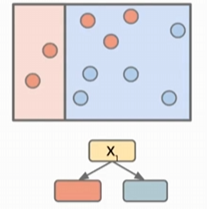

2) Далее, мы назначаем отдельным точкам веса $w_{i,t}$:

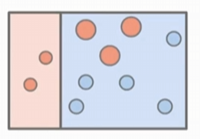

Большие веса назначаются тем точкам, которые были классифицированы неправильно. У нас было неправильно классифицировано три красные точки, для которых мы увеличили весовые коэффициенты. Для всех остальных точек веса были уменьшены.

3) Вычисляем общий коэффициент $\alpha_t$, который будет применяться к этому дереву:

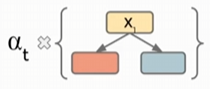

4) Мы получили первое дерево. **Второе дерево будет строиться только после того, как мы завершим построение первого дерева!** На данный момент у нас есть обновлённые веса $w_{i,t}$, которые можно применять для второго дерева:

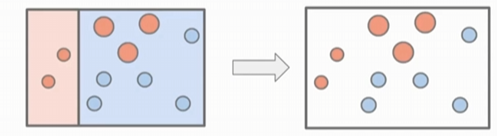

5) Переходим к построению второго дерева, причем оно будет обучаться не просто на исходных данных, а на **исходных данных умноженных на некоторые коэффициенты, которые косвенно несут в себе результаты работы предыдущего дерева**:

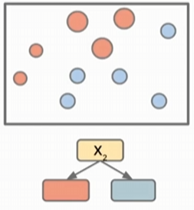

Можно сказать, что мы просим модель посмотреть на эти три точки более внимательно, чем на другие точки.

6) Во втором дереве можно выбрать другой признак для разбиения, причём второе дерево будет прилагать больше усилий для того, чтобы правильно классифицировать точки с большими весами:

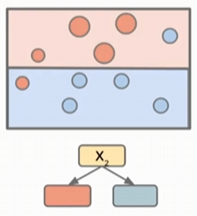

7) Мы получаем следующее разбиение:

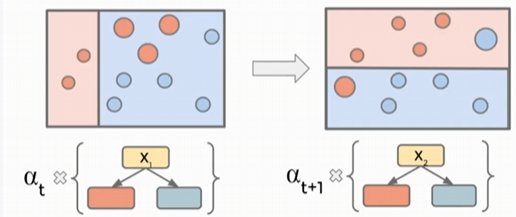

Второму дереву решений мы даём свой коэффициент $\alpha_{t+1}$

8) После этого коэффициенты $w_{i,t}$ вновь обновляются с учётом неправильно классифицированных точек

9) Строится третье дерево, получаем некоторое разбиение данных, обновляем коэффициенты:

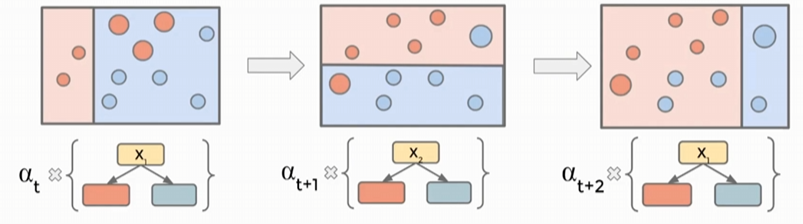

Можно допустить, что точки с большими весами всё таки будут классифицированы неправильно.

Эти шаги повторяются T количество раз:

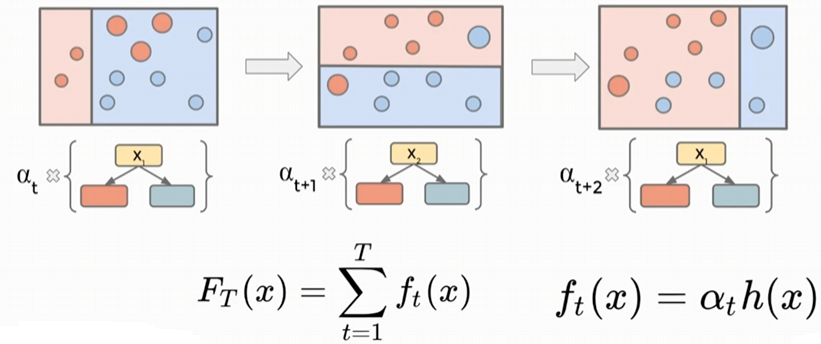

Столько раз, сколько простых деревьев планируется построить. Результаты работы отдельных моделей с некоторыми коэффициентами $\alpha$ суммируются.

Если попытаться нанести на график несколько отдельных моделей одновременно, то получится следующее разбиение пространства признаков на отдельные сектора:

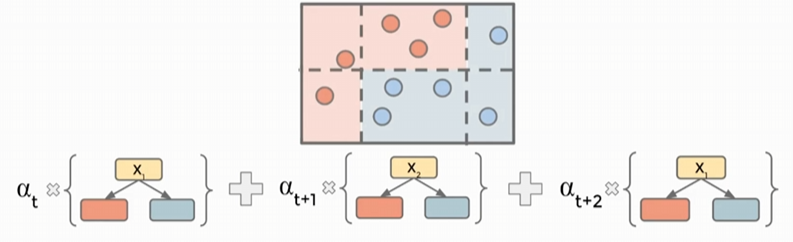

В каждом секторе модель больше склоняется либо к красному, либо к синему классу. В итоге, мы надеемсся на то, что сможем построить такой ансамбль моделей, который будет хорошо работать для решения нашей задачи.

## Итог

* AdaBoost использует ансамбли слабых моделей, которые постепенно(медленно) обучаются
* Некоторые слабые модели вносят в финальный результат бОльший вклад, чем другие - это учитывается умножением на параметр $\alpha_t$
* Каждая последующая модель $t$ обучается на заново взвешенных данных от предыдущей модели $t-1$

**Интуитивная интерпретация:**
* Каждое отдельное простое дерево представляет силу предсказания того или иного признака
* Постепенное построение таких деревьев и применение параметров $\alpha$ позволяет нам комбинировать вместе важность различных признаков

**Замечания:**
* **В отличие от случайных лесов, AdaBoost может приводить к переобученности**
* **Обычно, ошибка стабилизируется намного раньше, чем количество деревьев становится настолько большим, что возникает переобученность**

---
---
# Градиентный бустинг

Идея градиентного бустинга похожа на AdaBoost - слабые модели создаются постепенно, и затем объединяются в ансамбль. Объединение моделей выполняется последовательно, когда добавление очередной модели учитывает результаты работы предыдущих моделей.

В качестве базовой модели не обязательно использовать только деревья решений, просто для них результаты наиболее заметны.

В отличие от адаптивного бустинга, в градиентном бустинге применяется другой подход для выбора следующей модели. При обучении градиентный бустинг использует ошибки остатков(residual errors).

## Градиентный бустинг v.s. AdaBoost

1. В градиентном бустинге, на каждом шаге, допустимы более глубокие деревья, так как он достаточно устойчив к переобучению. В AdaBoost на каждом шаге были только простейшие деревья с одним узлом разделения данных
2. В градиентном бустинге, все деревья имеют одинаковые коэффициенты "learning rate", а в AdaBoost везде были разные коэффициенты
3. Вычисление градиента выполняется на основе ошибок предыдущей модели

## Пример - градиентный бустинг для регрессии

Задача - предсказание цены продажи дома:

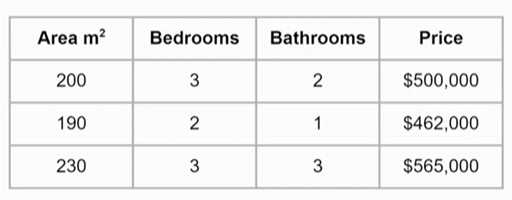

У нас есть три признака и цена дома. Для решения этой задачи берем дерево решений и обучаем его на этих данных, причём это дерево может быть более сложным, чем просто один узел разбиения и два листовых узла:

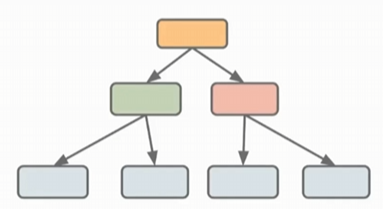

Мы получаем некоторое предсказание модели $\hat{y}$. Представим, что первое дерево работает не очень хорошо. Оно возвращает значение 509 000 для всех трёх домов, т.е. просто среднее значение:

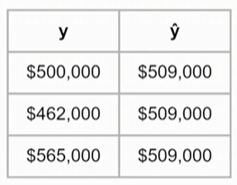

Далее можно вычислить ошибку(residual) как разницу между $y$ и $\hat{y}$:

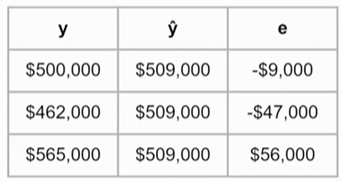

В данном случае ошибка может быть как положительной, так и отрицательной. Эти ошибки содержат информацию о том, насколько хорошо или плохо работает первая модель.

Далее, создаём вторую модель, но здесь нужно отметить - **в градиентном бустинге вторая модель не пытается предсказывать, на основе признаков, значение целевой переменной $y$, вместо этого, вторая модель пытается на основе признаков предсказывать ошибку:**

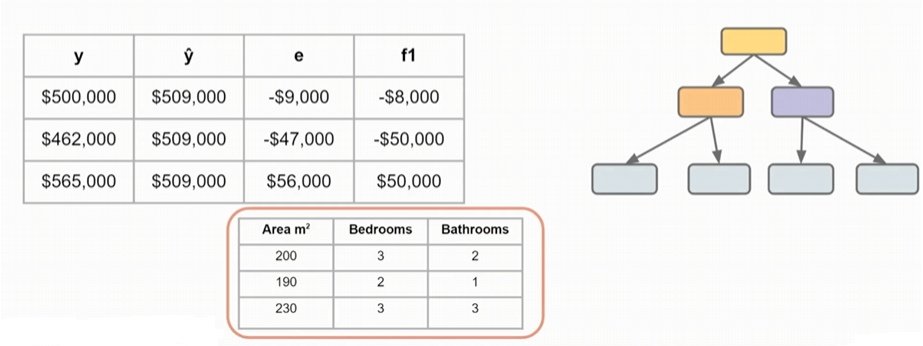

Здесь, результат работы этой модели обозначен как $f_1$.

Эта вторая модель по-прежнему на вход получает набор признаков, однако вместо предсказания целевой переменной, $y$, эта модель пытается на основе тех же признаков предсказать значение ошибки от предыдущей модели. Разумеется, что вторая модель также даёт предсказания с неточностями, поэтому $f_1$ отличается от той ошибки, которая присуща предыдущей модели.

**Что можно сделать со значениями $f_1$?**

Мы возьмём предсказания $\hat{y}$ и сделаем в них поправку с помощью $f_1$. Т.е. мы вычислим $F_1$ по формуле: $F_1 = \hat{y}+f_1$:

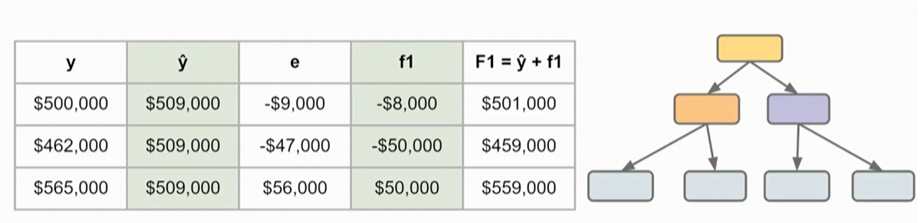

Здесь мы уточняем предсказания модели используя предсказания предыдущей модели. В итоге мы получаем уточнённые значения $F_1$, которые оказываются уже ближе к истинным значениям $y$.

Далее этот процесс можно выполнять многократно. Также мы получаем общую формулу: $$F_m = F_{m-1} + f_m$$
Причём можно повлиять на скорость работы этого процесса с помощью коэффициента *learning rate*: $$F_m = F_{m-1} + (\text{learning rate} * f_m)$$

Этот коэффициент будет одинаковым для всех шагов процесса, что также отличается от AdaBoost, где коэффициенты для каждой модели были различными. Мы можем устанавливать значения этого коэффициента самостоятельно - чем он будет меньше, тем больше будет требоваться времени и больше деревьев для того, чтобы получить хороший результат.

## Процесс градиентного бустинга

1. Создаем начальную модель $f_0$, которая предсказывает значение целевой переменной $y$ и получаем значения $\hat{y}$.
2. Создаём ещё одну модель, которая предсказывает ошибку: $e=y-f_0$
3. Создаём новое прогнозируемое значение: $F_1 = f_0 + \eta f_1\text{, где }\eta\text{ коэффициент learning rate}$
4. Повторяем при необходимости: $F_m = f_{m-1} + \eta f_m$

## Градиентный бустинг для задачи классификации

Для задач классификации можно применять метрику ошибки на основе логорифма:

$\hat{y}=\log{(\frac{\hat{p}}{1-\hat{p}})}$

$\hat{p}=\frac{1}{1+e^{-\hat{y}}}$

Получается, что измерить ошибки в данном случае можно с помощью формул для логистической регрессии.

## Интерпретация градиентного бустинга

Деревья последовательно оптимизируются с использованием ошибок и каждое следующее дерево пытается исправить ошибки предыдущего.

**Баланс, который нужно соблюсти - это время обучения.** Параметр *learning rate* меняется в пределах от 0 до 1. Если значение очень маленькое, то каждое следующее дерево добавляет лишь немного к общему результату, так как мы умножаем его на маленький коэффициент.

Чем меньше *learning rate* - тем больше нужно деревьев. Если значение *learning rate* будет слишком большим, то можно получить хорошие результаты с помощью небольшого количества деревьев. Однако, полученные таким образом результаты не будут самыми оптимальными, потому что небольшое количество деревьев означает, что у модели небыло достаточного количества деревьев, чтобы извлечь больше информации, что в свою очередь необходимо для того, чтобы получить более высокую точность модели.

---